In [81]:
import pandas as pd

train = pd.read_csv("/Users/chrisoh/Desktop/Data Science/titanic/train.csv", index_col="PassengerId")

print(train.shape)

train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
test = pd.read_csv("/Users/chrisoh/Desktop/Data Science/titanic/test.csv", index_col="PassengerId")

print(test.shape)

test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [83]:
%matplotlib inline

import seaborn as sns

import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Sex', ylabel='count'>

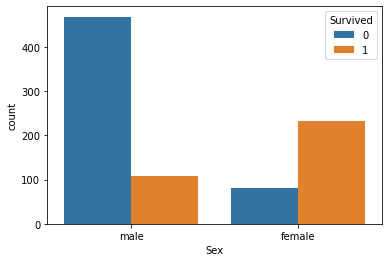

In [84]:
sns.countplot(data=train, x="Sex", hue="Survived")

In [85]:
pd.pivot_table(train, index="Sex", values="Survived")

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Pclass', ylabel='count'>

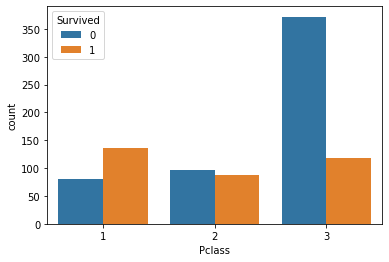

In [86]:
sns.countplot(data=train, x="Pclass", hue="Survived")

In [87]:
pd.pivot_table(train, index="Pclass", values="Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Embarked', ylabel='count'>

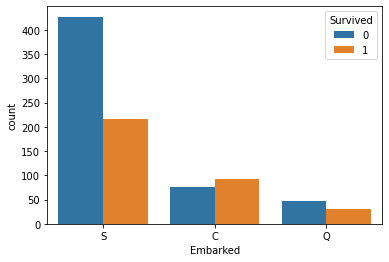

In [88]:
sns.countplot(data=train, x="Embarked", hue="Survived")

In [89]:
pd.pivot_table(train, index="Embarked", values="Survived")

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


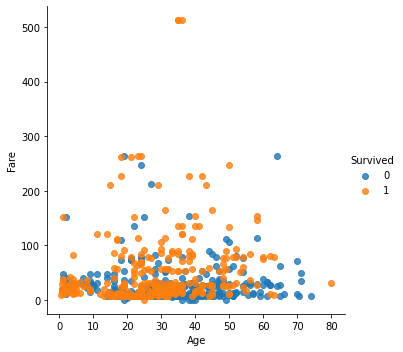

In [90]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

In [91]:
low_fare = train[train["Fare"] < 500]

In [92]:
train.shape, low_fare.shape

((891, 11), (888, 11))

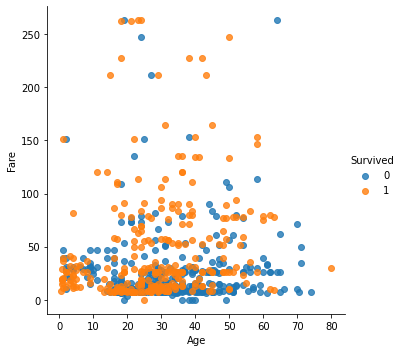

In [93]:
sns.lmplot(data=low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

In [94]:
low_low_fare = train[train["Fare"] < 100]

train.shape, low_fare.shape, low_low_fare.shape

((891, 11), (888, 11), (838, 11))

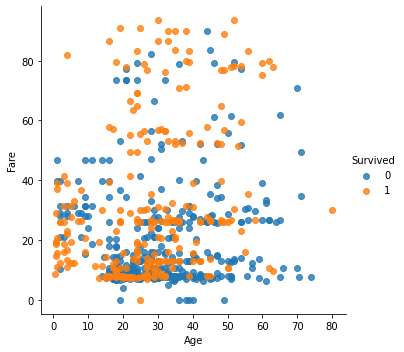

In [95]:
sns.lmplot(data=low_low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

In [96]:
#Preprocessing 전처리

In [97]:
train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1

print(train.shape)

train[["Sex", "Sex_encode"]].head()

(891, 12)


,Sex,Sex_encode
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


In [98]:
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1

print(test.shape)

test[["Sex", "Sex_encode"]].head()

(418, 11)


,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


In [99]:
train[train["Fare"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,


In [100]:
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


In [112]:
train["Fare_fillin"] = train["Fare"]

print(train.shape)

train[["Fare", "Fare_fillin"]].head()

(891, 17)


,Fare,Fare_fillin
PassengerId,,
1,7.2500,7.2500
2,71.2833,71.2833
3,7.9250,7.9250
4,53.1000,53.1000
5,8.0500,8.0500


In [102]:
test["Fare_fillin"] = test["Fare"]

print(test.shape)

test[["Fare", "Fare_fillin"]].head()

(418, 12)


,Fare,Fare_fillin
PassengerId,,
892,7.8292,7.8292
893,7.0000,7.0000
894,9.6875,9.6875
895,8.6625,8.6625
896,12.2875,12.2875


In [103]:
test.loc[test["Fare"].isnull(), "Fare_fillin"] = 0

test.loc[test["Fare"].isnull(), ["Fare", "Fare_fillin"]]


,Fare,Fare_fillin
PassengerId,,
1044,NaN,0.0


In [104]:
train["Embarked_C"] = train["Embarked"] == "C"

train["Embarked_S"] = train["Embarked"] == "S"

train["Embarked_Q"] = train["Embarked"] == "Q"

print(train.shape)

train[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(891, 16)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False


In [105]:
test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"

print(test.shape)

test[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(418, 15)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False


In [106]:
feature_names = ["Pclass", "Sex_encode", "Fare_fillin", "Embarked_C", "Embarked_S", "Embarked_Q"]

feature_names

['Pclass',
 'Sex_encode',
 'Fare_fillin',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q']

In [107]:
label_name = "Survived"
label_name

'Survived'

In [116]:
x_train = train[feature_names]

print(x_train.shape)

x_train.head()

(891, 6)


,Pclass,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
1,3,0.0,7.2500,False,True,False
2,1,1.0,71.2833,True,False,False
3,3,1.0,7.9250,False,True,False
4,1,1.0,53.1000,False,True,False
5,3,0.0,8.0500,False,True,False


In [119]:
y_train = train[label_name]

print(y_train.shape)

y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [142]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5)
model

DecisionTreeClassifier(max_depth=5)

In [146]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [1]:
import graphviz

ModuleNotFoundError: No module named 'graphviz'